# Single Factor Analysis of Volume on CDB bonds in China
20191109, made by Zhang Qian.

## Pkgs and Paths

In [1]:
%%time
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
root_path = os.getcwd()
data_path = root_path + '\\Data_input\\'
output_path = root_path + '\\Data_output\\'

Wall time: 1.15 s


## Import Data
Column names should be `['Trade_date', 'Asset_ID', 'Factor', 'Price']`, regardless of the order.

In [2]:
%%time
fn = data_path+'gk_vol_and_tem.xlsx'
df_conn = pd.read_excel(fn, index=False)
df_conn.columns = ['Trade_Date', 'Asset_ID', 'Factor', 'Price']

Wall time: 965 ms


In [3]:
df_conn.head()

,Trade_Date,Asset_ID,Factor,Price
0,2015-01-05,140201.IB,2,3.9321
1,2015-01-05,140202.IB,4,3.9511
2,2015-01-05,140203.IB,5,4.0505
3,2015-01-05,140208.IB,4,3.9334
4,2015-01-05,140209.IB,4,3.9940


In [4]:
df_conn.tail()

,Trade_Date,Asset_ID,Factor,Price
23239,2019-09-09,190203.IB,57,3.2929
23240,2019-09-09,190204.IB,6,3.5456
23241,2019-09-09,190205.IB,168,3.5585
23242,2019-09-09,190208.IB,20,3.2752
23243,2019-09-09,190210.IB,727,3.4501


## Step 1: initialize `factor_analysis_tool.Factor`

- `df_conn` is a dataframe includeing four colums: `['Trade_date', 'Asset_ID', 'Factor', 'Price']`
- `price_mode` indicates the mode of the price, e.g. `'yield_in_pct'`represents YTM of bonds.

In [5]:
%%time
import factor_analysis_tool
reload(factor_analysis_tool)
m = factor_analysis_tool.Factor(df_conn=df_conn, price_mode='yield_in_pct')
# Alternatively, you can:
# m = factor_analysis_tool.Factor()  
# m.set_factor_and_price(df_conn, price_mode='yield_in_pct')

Wall time: 1.47 s


## Step 2: see the summary of volumes
`factor_analysis_tool.summarize_factor()` returns hitogram of factors：
  - `hist_bound=[1,100]` indicates that the lower bound and the upper bound are 1 and 100 respectively. If not specified, no restrictions will be made.
  - `hist_bins=99` set the number of the bins in the histgram as 99.

Wall time: 372 ms


Asset_ID,120201.IB,130205.IB,130222.IB,130230.IB,130231.IB,130238.IB,130239.IB,130240.IB,130244.IB,130246.IB,...,190201.IB,190202.IB,190203.IB,190204.IB,190205.IB,190206.IB,190207.IB,190208.IB,190209.IB,190210.IB
count,11.000000,21.000000,17.000000,32.000000,46.000000,121.000000,61.000000,66.000000,26.000000,52.000000,...,157.000000,154.000000,146.000000,130.000000,163.000000,83.000000,77.000000,48.000000,10.000000,77.000000
mean,1.454545,1.238095,1.294118,1.250000,1.434783,1.702479,1.540984,1.409091,1.307692,1.500000,...,13.401274,27.714286,74.089041,16.907692,433.098160,11.337349,23.376623,52.520833,3.800000,936.792208
std,0.934199,0.538958,0.771744,0.567962,0.778950,1.458565,0.941165,0.655797,0.735893,1.260252,...,8.361895,16.353415,38.998129,12.177273,264.189962,8.215508,13.266538,29.340256,2.347576,504.627751
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,1.000000,6.000000,1.000000,1.000000,4.000000,1.000000,79.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,16.000000,47.000000,7.000000,249.000000,5.000000,14.000000,33.500000,2.250000,378.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,25.000000,70.500000,15.000000,385.000000,10.000000,22.000000,49.500000,3.500000,1156.000000
75%,1.500000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,19.000000,35.000000,99.750000,22.750000,591.000000,17.000000,32.000000,65.000000,4.750000,1312.000000
max,4.000000,3.000000,4.000000,3.000000,4.000000,8.000000,6.000000,3.000000,4.000000,8.000000,...,41.000000,88.000000,193.000000,62.000000,1181.000000,48.000000,65.000000,134.000000,8.000000,1807.000000


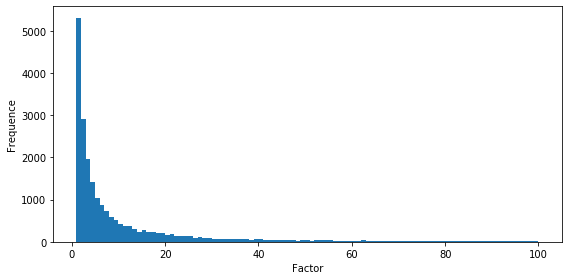

In [6]:
%%time
des, fig = m.summarize_factor(hist_bound=[1,100], hist_bins=99)
fig.savefig(output_path + 'Histogram of volumes.png', dpi=200)
des

## Step 3: IC Analysis
- `return_horizon=[0, 5]`: the return horizon starts from today to five trading days later, in other word, one week.
- `return_mode = 'spread_in_pct'`: we generate return by simply calculating the spread along the horizon.
- `min_valid_obs=10`: if number of valid volumes on a day is smaller than 10, then ignore this day.

Generating returns...
Done!
Calculating IC...
Done!
Wall time: 2.75 s


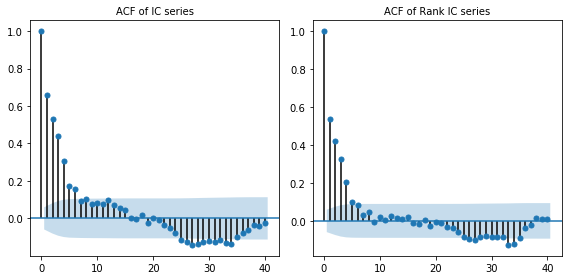

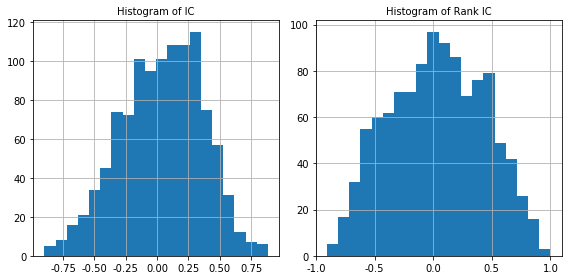

In [7]:
%%time
output = m.ic_analysis_all(
    return_horizon=[0, 5],
    return_mode = 'spread_in_pct',
    min_valid_obs=10,
    
)
output.fig_ic_acf.savefig(output_path + 'ACF of IC and Rank IC.png', dpi=200)
output.fig_ic_hist.savefig(output_path + 'Hist of IC and Rank IC.png', dpi=200)

In [8]:
output.ic_dataframe.head()

,ic,rank_ic
Trade_Date,,
2015-01-05,0.270671,0.450863
2015-01-06,-0.351203,-0.283750
2015-01-07,-0.309114,-0.501402
2015-01-08,-0.238223,-0.162034
2015-01-09,-0.025744,0.119193


In [9]:
output.ic_description

,ic,rank_ic
count,1091.000000,1091.000000
mean,0.037594,0.035618
std,0.324880,0.404078
min,-0.899077,-0.906608
25%,-0.186833,-0.269550
50%,0.064818,0.036927
75%,0.280550,0.354714
max,0.883641,1.000000


## Step 4: Portfolio analysis
- `return_horizon=[0, 5]`: the return horizon starts from today to five trading days later, in other word, one week.
- `return_mode = 'spread_in_pct'`: we generate return by simply calculating the spread along the horizon.
- `min_valid_obs=10`: if number of valid volumes on a day is smaller than 10, then ignore this day.
- `group_by = 'quantiles'`: construct portfolio by quantiles of factor values.
- `quantile_edges = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`: here the edges split bonds into ten portfolios.
- `aggregate_factor_by = 'median'`: we simply set portfolio factor as the median bonds factors in it.
- `aggregate_return_by = 'median'`: we simply set portfolio return as the median bonds returns in it.

In [10]:
%%time
m.construct_groups(
            return_horizon = [0, 5],
            return_mode = 'spread_in_pct',
            min_valid_obs = 10,
            group_by = 'quantiles',
            quantile_edges = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            aggregate_factor_by = 'median',
            aggregate_return_by = 'median',
)

Generating returns...
Done!
Grouping factor...
Done!
Aggregating factor...
Done!
Done!
Aggregating returns...
Done!
Wall time: 15 s


Wall time: 2.21 s


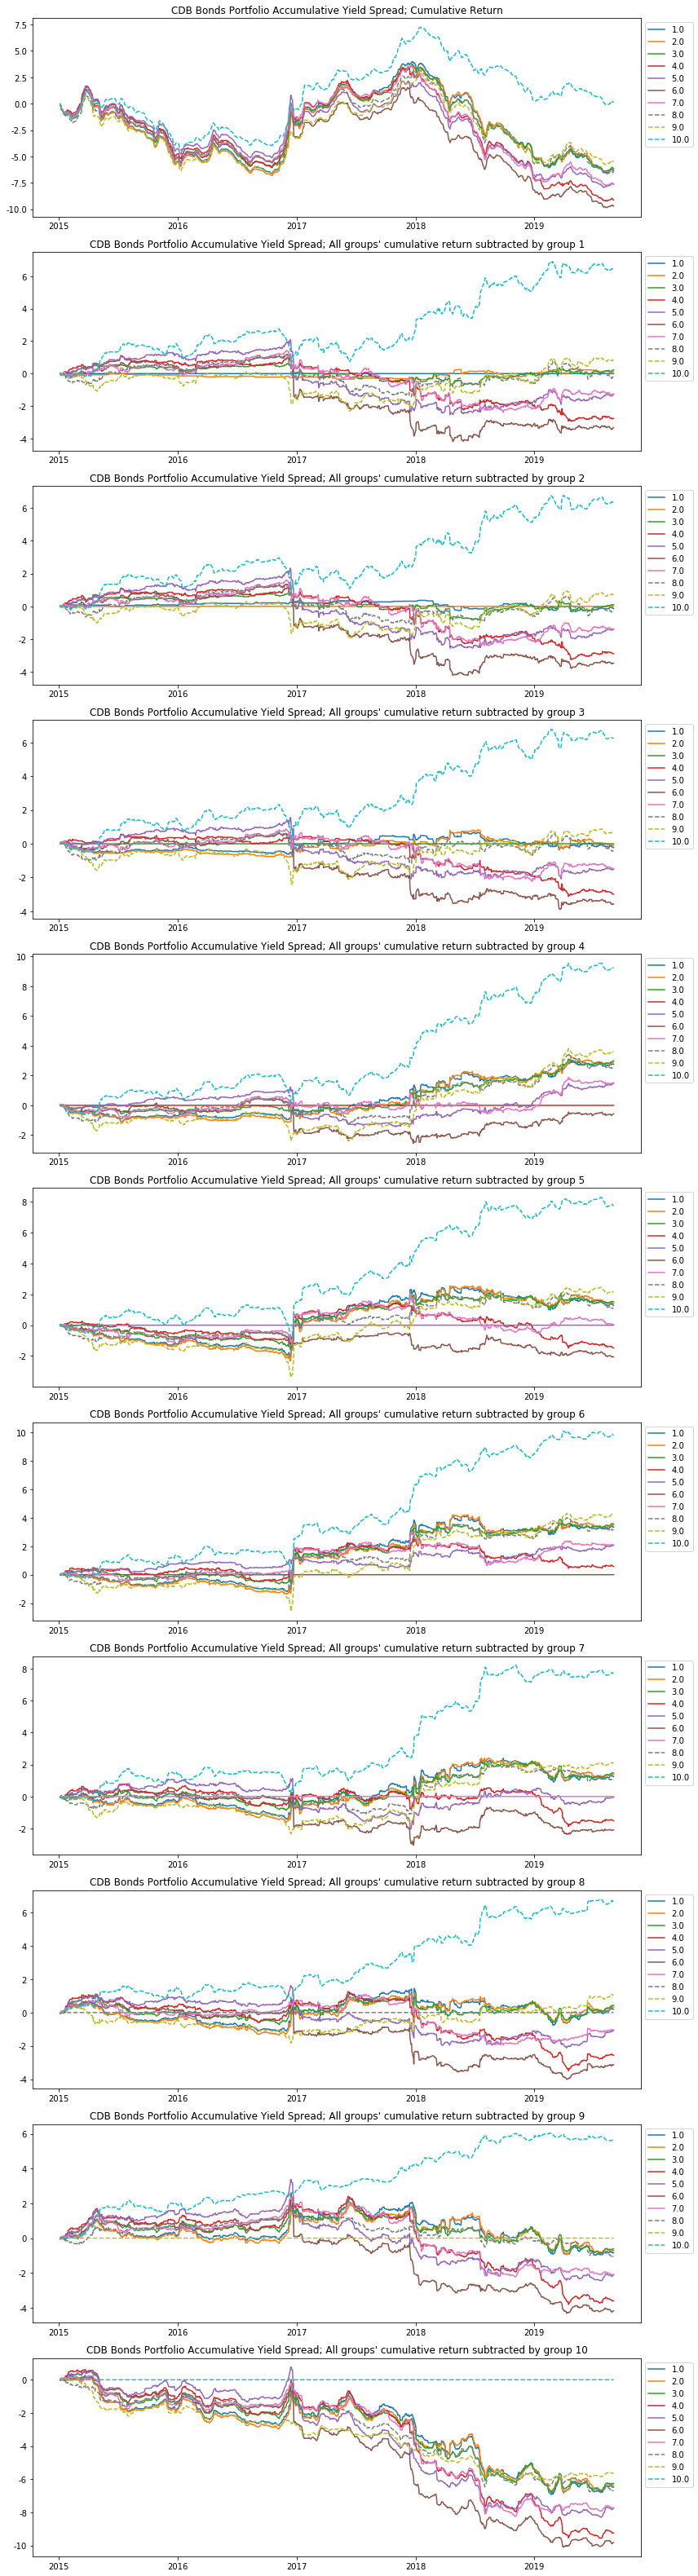

In [11]:
%%time
title_pre = 'CDB Bonds Portfolio Accumulative Yield Spread'
fig = m.plot_group_cum_return(title=title_pre, fig_size=[12, 4])
fig.savefig(output_path + title_pre + '.png', dpi=200)